<a href="https://colab.research.google.com/github/VladislavRkm/cs102/blob/homework06/homework06_R_Rakhmanov_Vladislav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1

    1. Загрузите датасет music_genre.csv.
    2. Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!)
    3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
    4. Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.



In [6]:
# Загрузите датасет music_genre.csv
library(dplyr)
df <- read.csv('music_genre.csv')

# Возьмите 20 тысяч случайных строк из датасета
df <- sample_n(df, 20000)

# проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их
df <- distinct(df)

# строки, в которых значение в столбце artist_name – empty_field - удалить
nrow(df[df$artist_name == 'empty_field', ])
new_df <- subset(df, artist_name!='empty_field')
new_df <- na.omit(new_df)
new_df

[1] 956

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,54476,Space Jesus,HMU - Esseks Remix,31,0.375000,0.732,156279,0.738,5.02e-01,D,0.9220,-7.610,Major,0.4120,171.998,4-Apr,0.4730,Electronic
2,53183,Mashiro Ayano,Rinkou,20,0.178000,0.394,276640,0.852,0.00e+00,E,0.2330,-3.730,Major,0.0668,166.047,4-Apr,0.4160,Anime
3,63891,Bombay Bicycle Club,Shuffle,55,0.316000,0.627,-1,0.959,5.76e-03,G,0.1120,-4.744,Major,0.0298,109.98100000000001,4-Apr,0.3970,Alternative
4,51056,"Grover Washington, Jr.",Inner City Blues (Make Me Wanna Holler),34,0.083700,0.650,435160,0.603,2.56e-01,C#,0.0317,-10.523,Major,0.0574,?,4-Apr,0.8320,Jazz
5,79595,Héctor Lavoe,La Fama,43,0.798000,0.672,-1,0.808,7.43e-03,C#,0.0839,-7.413,Major,0.0432,95.339,4-Apr,0.8510,Jazz
6,29803,Jelly Roll,My Smoking Song (feat. B Real),43,0.405000,0.801,243500,0.582,1.07e-06,F#,0.1530,-6.843,Minor,0.2420,81.012,4-Apr,0.6400,Country
7,49452,Bassnectar,Level Up,38,0.000656,0.630,257143,0.948,5.04e-04,C#,0.0678,-4.557,Major,0.1540,139.991,4-Apr,0.8080,Electronic
8,38177,Jyotsna Srikanth,Haunting Thoughts - Sallapam,32,0.679000,0.528,406653,0.697,8.41e-01,G,0.0440,-8.064,Major,0.5960,126.03399999999999,4-Apr,0.7750,Classical
9,26278,Hot Chip,Boy From School,55,0.161000,0.631,319653,0.863,5.85e-05,G#,0.0846,-3.963,Minor,0.0297,125.994,4-Apr,0.4970,Alternative


Задание 2

    1. Выведите долю каждого жанра в датасете.
    2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
    3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
    4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).


In [9]:
# Выведите долю каждого жанра в датасете
new_df <- na.omit(new_df)
genre_props <- prop.table(table(df$music_genre))

cat("Доля каждого жанра в датасете:\n")
print(genre_props)

Доля каждого жанра в датасете:

            Alternative       Anime       Blues   Classical     Country 
0.000050005 0.098159816 0.100860086 0.099809981 0.098909891 0.100510051 
 Electronic     Hip-Hop        Jazz         Rap        Rock 
0.101960196 0.101360136 0.102410241 0.098359836 0.097609761 


In [10]:
library(dplyr)
genres = df["music_genre"].genre_props().index
values = df["music_genre"].genre_props().values
most_genre = pd.DataFrame({"Music genre": genres, "Values": values})

colours = []
max_value = max(values)
for value in values:
    if value < max_value:
        colours.append('grey')
    else:
        colours.append('blue')
plt.grid()

sns.barplot(x=most_genre['Values'], y=most_genre['Music genre'], orient='h', palette=colours)
plt.xlabel('Number of tracks')
plt.ylabel('Music genre')
plt.title('Distribution of number of tracks by genre')
plt.show()

ERROR: ignored

In [11]:
# самый танцевальный жанр
danceability_by_genre <- new_df %>% 
  group_by(music_genre) %>% 
  summarize(mean_danceability = mean(danceability))

most_danceable_genre <- danceability_by_genre %>% 
  arrange(desc(mean_danceability)) %>% 
  head(1)

cat("Самый танцевальный жанр:", most_danceable_genre$music_genre, "\n")
cat("Среднее значение показателя danceability:", most_danceable_genre$mean_danceability, "\n")

Самый танцевальный жанр: Hip-Hop 
Среднее значение показателя danceability: 0.7159278 


`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


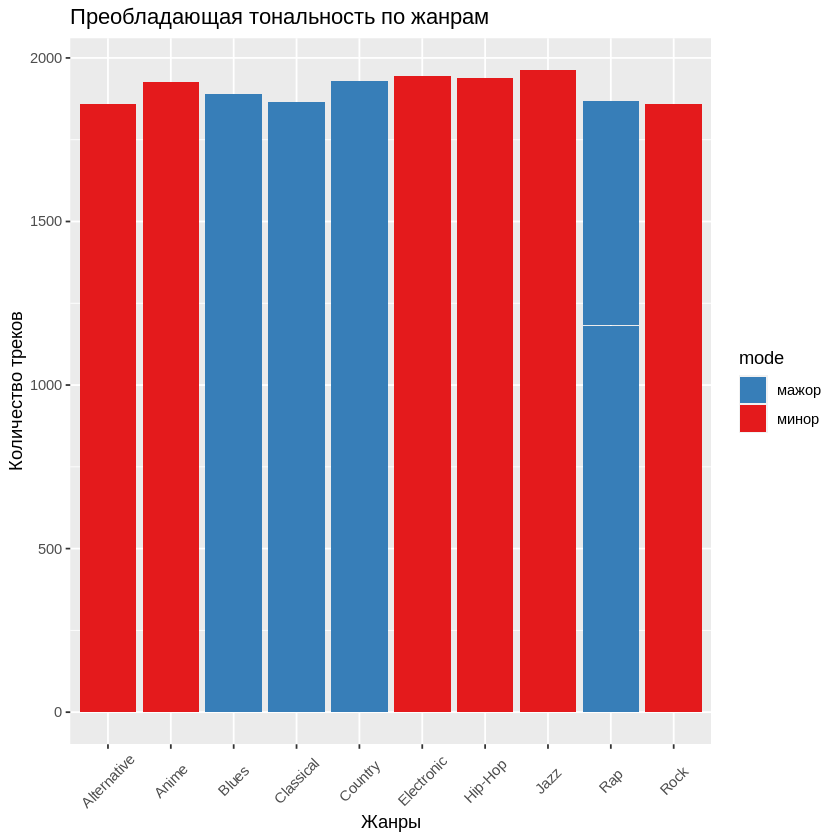

In [15]:
# Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше
new_df <- na.omit(new_df)
tonality_by_genre <- new_df %>%
  group_by(music_genre, key) %>%
  summarise(track_count = n()) %>%
  mutate(mode = ifelse(sum(key == "C") == 0 & sum(key == "D") == 0, "No tracks",
                       ifelse(track_count[key == "C"] < track_count[key == "D"], "major", "minor")))

ggplot(tonality_by_genre, aes(x = music_genre, y = track_count, fill = mode)) +
  geom_bar(stat = "identity") +
  labs(title = "Преобладающая тональность по жанрам", 
       x = "Жанры", y = "Количество треков") +
  scale_fill_manual(values = c("#377eb8", "#e41a1c", "#999999"), 
                    labels = c("мажор", "минор")) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

Задание 3

    1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
    2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.


In [16]:
# Выведите исполнителя, у которого больше всего треков в датасете
new_df <- na.omit(new_df)
most_tracks <- names(sort(table(new_df$artist_name), decreasing = TRUE)[1])
most_count <- max(table(new_df$artist_name))
cat("Исполнитель с наибольшим количеством треков:", most_tracks, "(", most_count, "треков)\n")

least_tracks <- names(sort(table(new_df$artist_name))[1])
least_count <- min(table(new_df$artist_name))
cat("Исполнитель с наименьшим количеством треков:", least_tracks, "(", least_count, "трек)\n")

Исполнитель с наибольшим количеством треков: Nobuo Uematsu ( 169 треков)
Исполнитель с наименьшим количеством треков: (Hed) P.E. ( 1 трек)


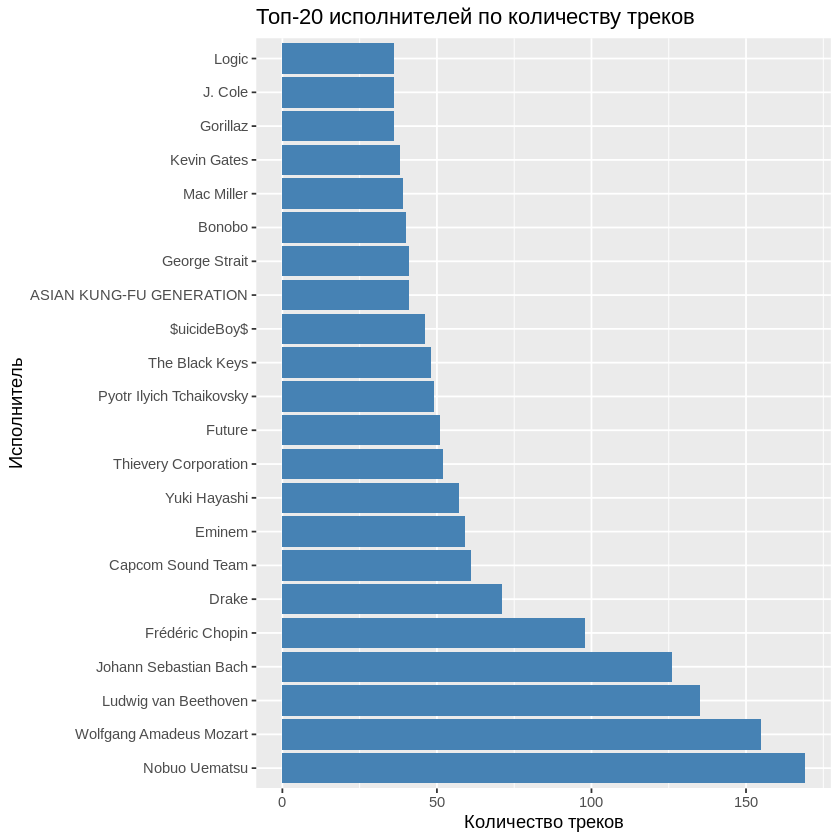

In [17]:
# Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей
library(ggplot2)

top_artists <- new_df %>%
  group_by(artist_name) %>%
  summarize(total_songs = n()) %>%
  top_n(20, total_songs) %>%
  arrange(desc(total_songs))

ggplot(top_artists, aes(y = reorder(artist_name, -total_songs), x = total_songs)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.y = element_text(hjust = 1)) +
  ggtitle("Топ-20 исполнителей по количеству треков") +
  xlab("Количество треков") +
  ylab("Исполнитель")

Задание 4

    1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
    2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,54476,31,0.3750,0.732,156279,0.738,5.02e-01,0.9220,-7.610,0.4120,0.473
2,53183,20,0.1780,0.394,276640,0.852,0.00e+00,0.2330,-3.730,0.0668,0.416
3,63891,55,0.3160,0.627,-1,0.959,5.76e-03,0.1120,-4.744,0.0298,0.397
4,51056,34,0.0837,0.650,435160,0.603,2.56e-01,0.0317,-10.523,0.0574,0.832
5,79595,43,0.7980,0.672,-1,0.808,7.43e-03,0.0839,-7.413,0.0432,0.851
6,29803,43,0.4050,0.801,243500,0.582,1.07e-06,0.1530,-6.843,0.2420,0.640


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000,0.016,-0.008,0.013,-0.005,0.009,-0.013,0.005,0.012,0.001,0.002
popularity,0.016,1.000,-0.281,0.357,-0.087,0.209,-0.359,-0.040,0.312,0.230,0.120
acousticness,-0.008,-0.281,1.000,-0.344,0.053,-0.789,0.375,-0.110,-0.727,-0.160,-0.263
danceability,0.013,0.357,-0.344,1.000,-0.155,0.260,-0.296,-0.046,0.385,0.281,0.427
duration_ms,-0.005,-0.087,0.053,-0.155,1.000,-0.059,0.125,0.027,-0.095,-0.080,-0.132
energy,0.009,0.209,-0.789,0.260,-0.059,1.000,-0.385,0.188,0.838,0.160,0.392


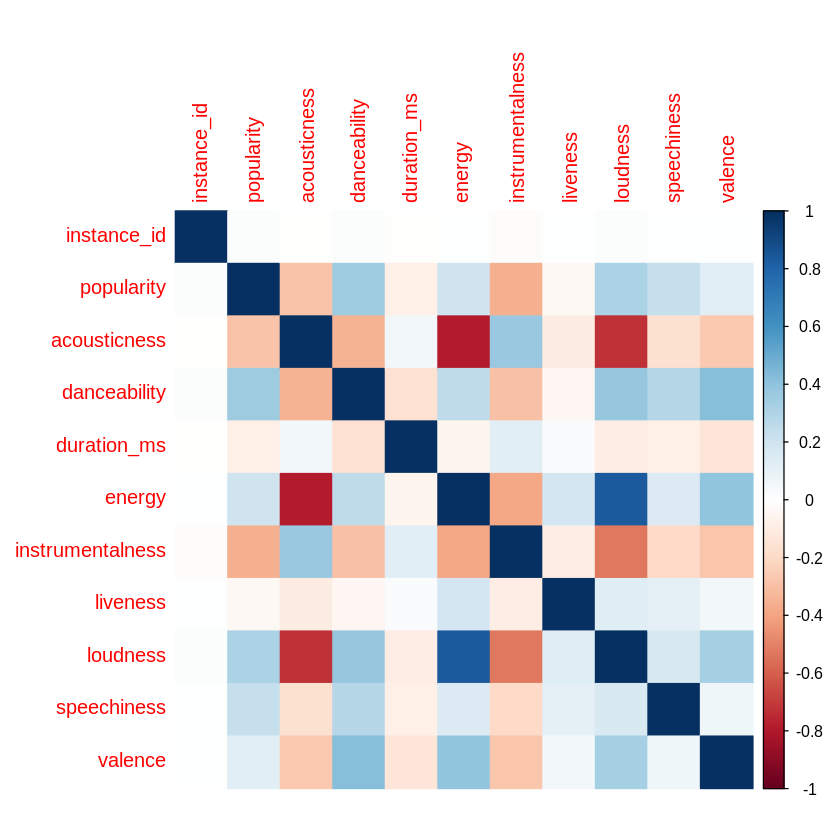

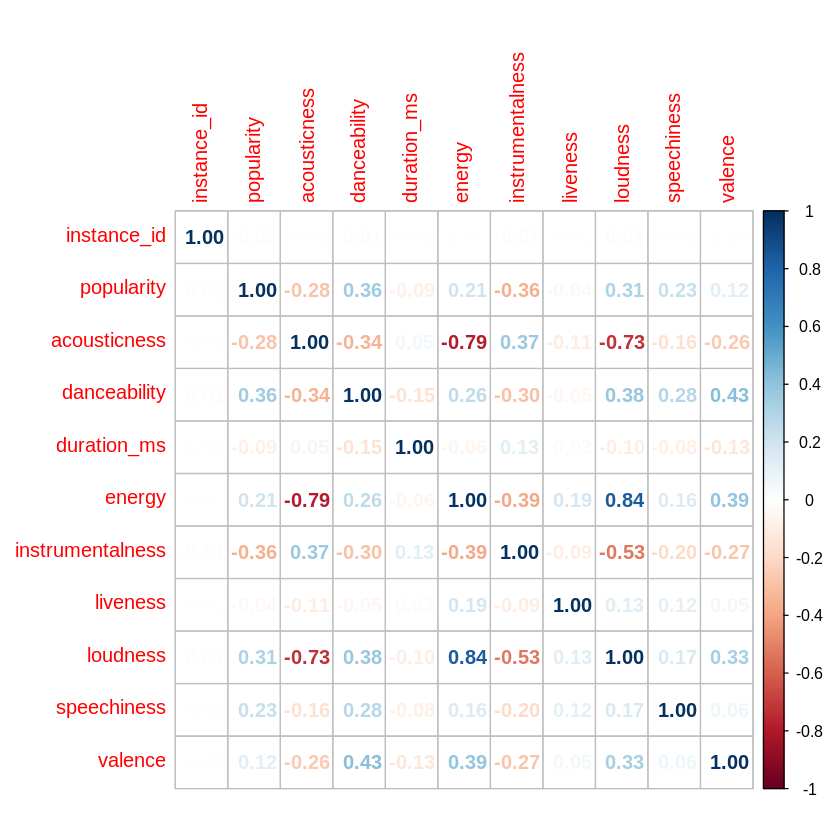

In [18]:
# Постройте корреляционную матрицу для характеристик треков
new_df <- na.omit(new_df)
install.packages("corrplot")
library(corrplot)

cor_df <- select_if(new_df, is.numeric)
head(cor_df)
# correlation matrix
M<-cor(cor_df, use="pairwise.complete.obs")
head(round(M,3))

# as colour
corrplot(M, method="color")
 
# as number
corrplot(M, method="number")

In [19]:
# Посчитайте корреляцию между популярностью (popularity) и длиной названия трека
cor_df <- select_if(new_df, is.numeric)
cat(cor(new_df$popularity, new_df$duration_ms, use = "complete.obs"))

-0.08704247

Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

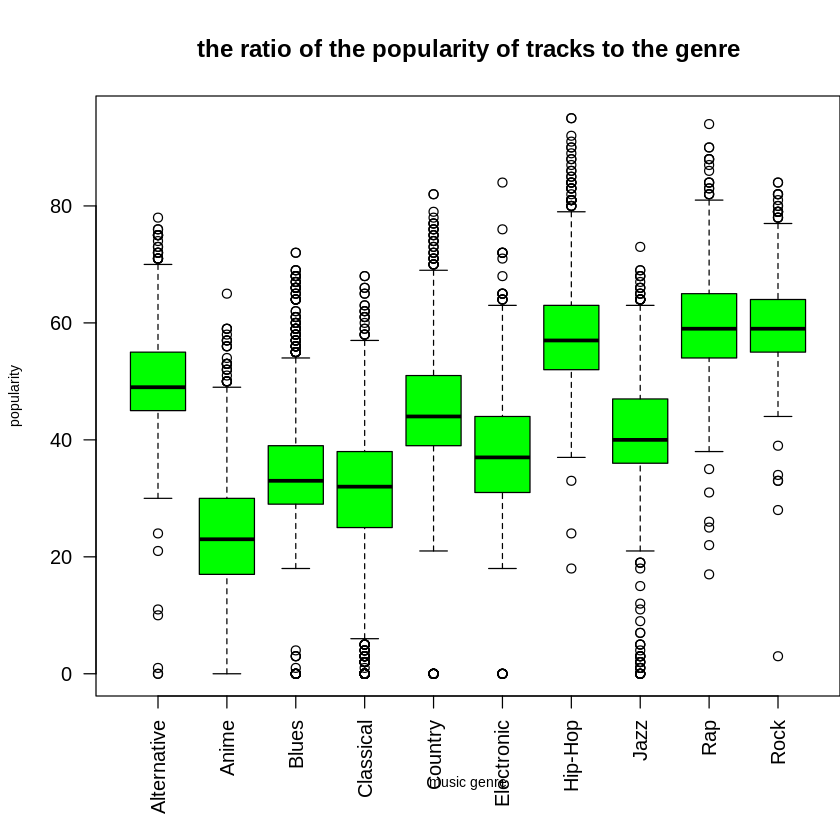

In [20]:
# Покажите на ящиковой диаграмме отношение популярности треков к жанру
par(mar=c(6,4,4,0))
boxplot(popularity ~ music_genre, data = new_df,
        las=2,
        xlab = "music genre",
        ylab = "popularity",
        main = "the ratio of the popularity of tracks to the genre",
        col = "green",
        cex.lab=0.7)

Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.


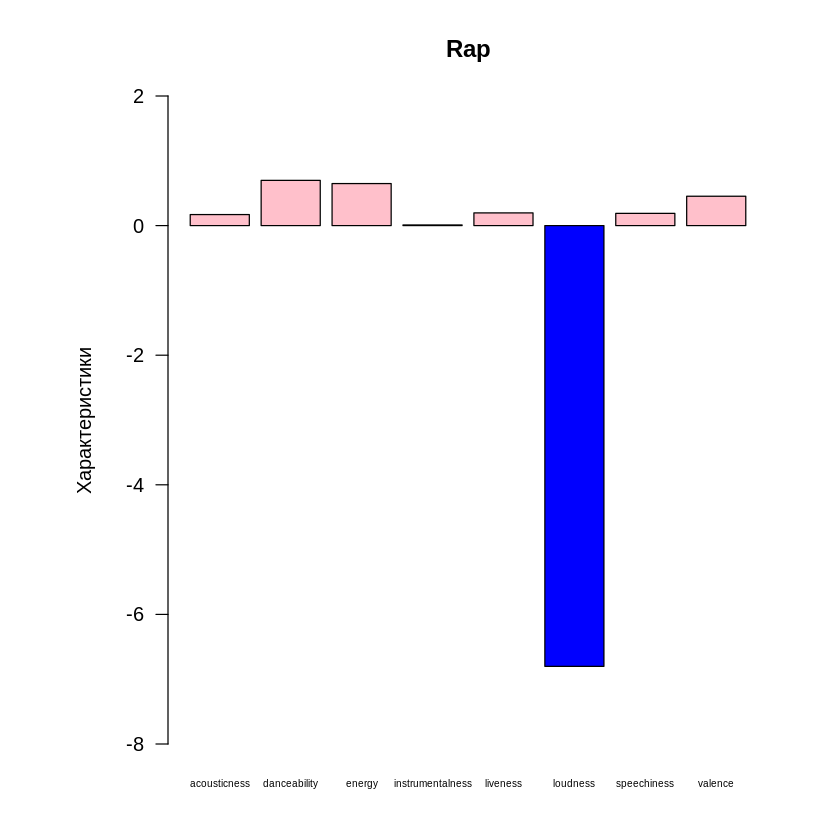

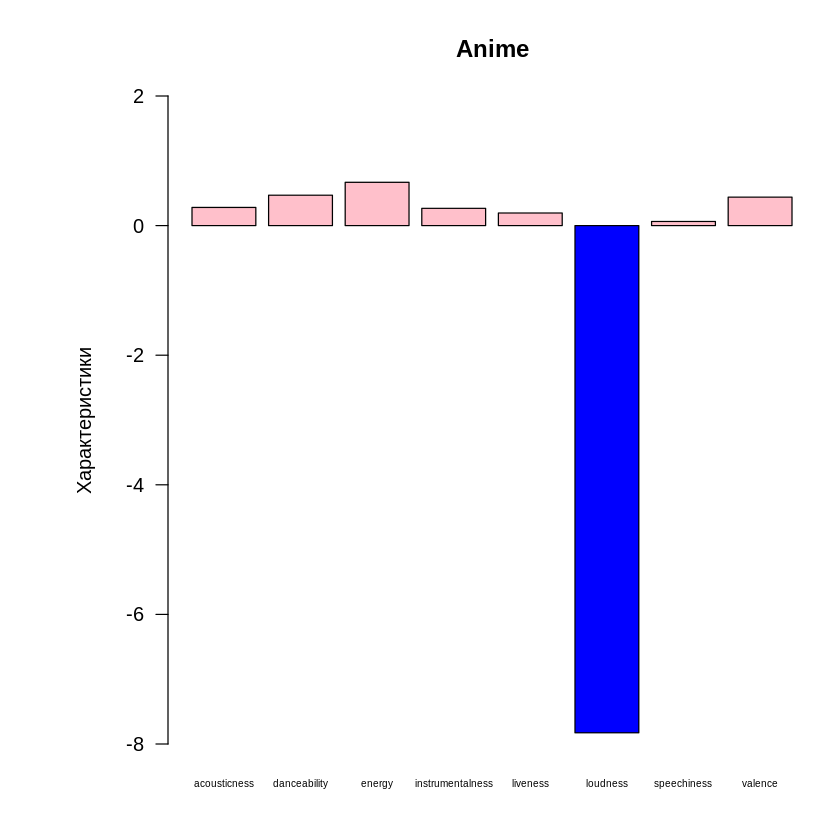

In [21]:
new_df <- na.omit(new_df)
df <- new_df
grouped <- df %>% group_by(music_genre)  %>%
                      summarise(status = mean(popularity))  # складываем тот же датасет, сгруппированный по жанрам и средним значениям популярности

most_popular <- (grouped %>% filter(max(status) == status))[[1]]
least_popular <- (grouped %>% filter(min(status) == status))[[1]]  #Находим по табличке самый популярный и самый непопулярный жанр с помощью фильтрации и извлекаем строки с этими жанрами из датасета
ee <- subset(df, music_genre == most_popular)
yy <- subset(df, music_genre == least_popular)

ee <- ee[,!names(ee) %in% c("instance_id", "popularity", "duration_ms")]
yy <- yy[,!names(yy) %in% c("instance_id", "popularity", "duration_ms")]

ee <- ee[ , unlist(lapply(ee, is.numeric))]    # Identify numeric columns
yy <- yy[ , unlist(lapply(yy, is.numeric))] 

X <- as.numeric(unlist(colMeans(ee)))  # Извлекаем для таблицы самого популярного жанра средние значения по каждому столбцу и названия столбцов
Y <- names(unlist(colMeans(ee)))

colors = list()
for(i in 1:length(X)) {                                    
  if (X[i] < 0) {
    colors[[length(colors) + 1]] <- 'blue'
  } else {
    colors[[length(colors) + 1]] <- 'pink'
  }                           
}
v = unlist(c(colors))

par(mar=c(4,7,4,3))
barplot(X,names.arg=c(Y),
ylab="Характеристики",
col=v, 
main=most_popular, 
beside = TRUE, 
cex.names=0.5, 
ylim = c(-8, 2), 
las=1)

X <- as.numeric(unlist(colMeans(yy)))
Y <- names(unlist(colMeans(yy)))

colors = list()
for(i in 1:length(X)) {                                    
  if (X[i] < 0) {
    colors[[length(colors) + 1]] <- 'blue'
  } else {
    colors[[length(colors) + 1]] <- 'pink'
  }                           
}
v = unlist(c(colors))

par(mar=c(4,7,4,1))
barplot(X,names.arg=c(Y),
ylab="Характеристики",
col=v, 
main=least_popular, 
beside = TRUE, 
cex.names=0.5, 
ylim = c(-8, 2), 
las=1)

Задание 8

    1. Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
    2. Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности.
    3. На круговой диаграмме покажите численное соотношение треков разной длительности.



In [22]:
library(ggplot2)

# Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая", "средняя", "длинная"
new_df$длительность_трека <- cut(new_df$duration_ms/1000/60, 
                                      breaks = c(0, 3, 5, Inf), 
                                      labels = c("короткая", "средняя", "длинная"))
new_df <- subset(new_df, длительность_трека!='NA')
#new_df$длительность_трека

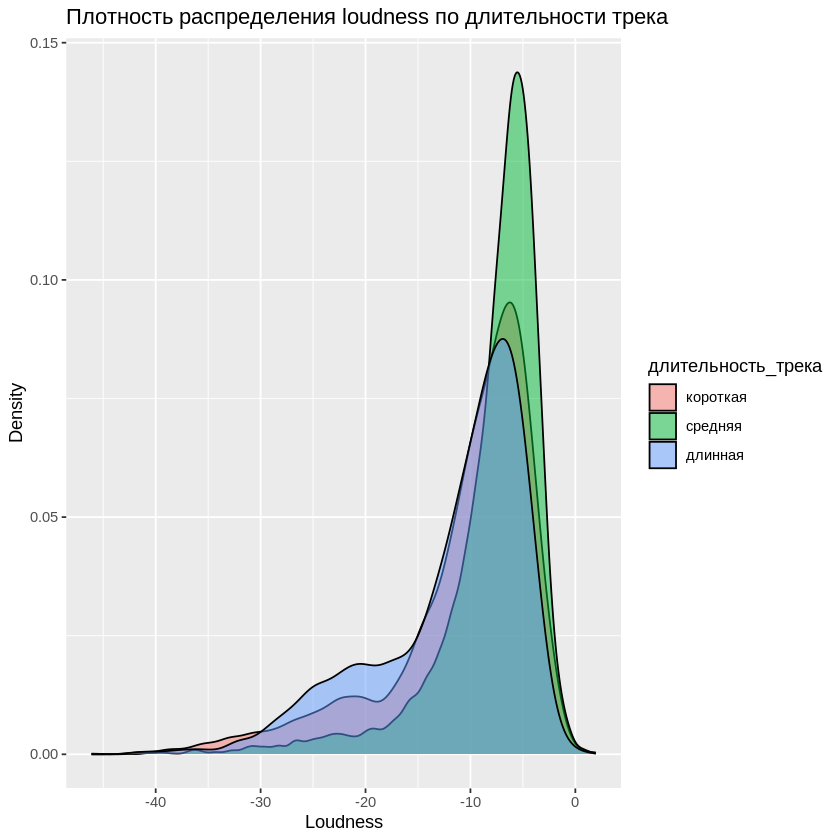

In [23]:
# Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности
#head(new_df)
ggplot(new_df, aes(x = loudness, fill = длительность_трека)) + 
  geom_density(alpha = 0.5) +
  xlab("Loudness") +
  ylab("Density") +
  ggtitle("Плотность распределения loudness по длительности трека")

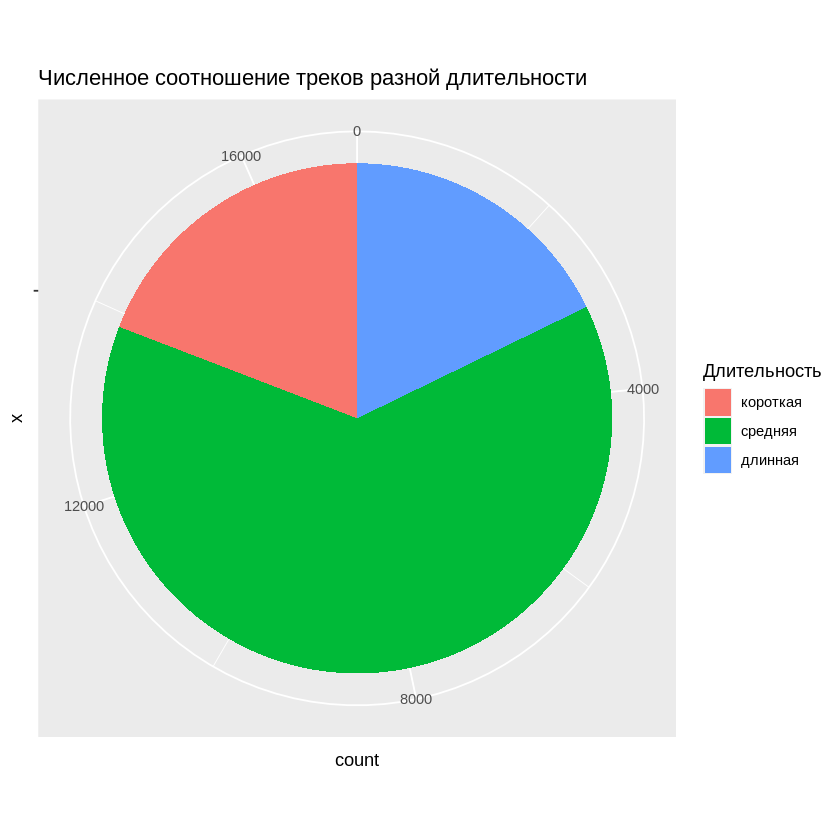

In [24]:
# На круговой диаграмме покажите численное соотношение треков разной длительности
#head(new_df)
ggplot(new_df, aes(x = "", fill = длительность_трека)) + 
  geom_bar(width = 1) +
  coord_polar("y", start=0) +
  labs(fill = "Длительность") +
  ggtitle("Численное соотношение треков разной длительности")